<a href="https://colab.research.google.com/github/stableminded/Synapse_lp/blob/CV_Week_1/SynapseWeekOneCV_Dhairya_Mehta.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **CV Task 1**

## **Synapse Learning Period**
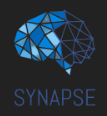

Congratulations on finishing the basic learning period! Now you will specialise in one of the most interesting domains in ML: Computer Vision. If you have been living under a rock and *still* don't know what that is, go through the below link:

https://towardsdatascience.com/everything-you-ever-wanted-to-know-about-computer-vision-heres-a-look-why-it-s-so-awesome-e8a58dfb641e

So yeah, a lot of cool stuff can be done with CV. But before we progress to doing that cool stuff, your basics need to be made very sound, which is what completing this task will do for you.

## mounting drive and importing stuff

In [1]:
from google.colab import drive
drive.mount('/content/gdrive/')

Drive already mounted at /content/gdrive/; to attempt to forcibly remount, call drive.mount("/content/gdrive/", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import math
%matplotlib inline

## opencv basics

Before we get into this, what even is an image? Get your basics cleared from below:

https://www.analyticsvidhya.com/blog/2021/03/grayscale-and-rgb-format-for-storing-images/

To actually preprocess an image, lets use the wget command to actually import one first.

 * wget is a linux command that helps us download content from the web.
 * we can use the -O flag to store it using a custom name.
 * all linux commands can be accessed in jupyter notebooks using ! before the command.

In [3]:
# run this cell as it is.
!wget -O pika.jpg https://upload.wikimedia.org/wikipedia/en/a/a6/Pok%C3%A9mon_Pikachu_art.png

--2023-11-17 02:06:44--  https://upload.wikimedia.org/wikipedia/en/a/a6/Pok%C3%A9mon_Pikachu_art.png
Resolving upload.wikimedia.org (upload.wikimedia.org)... 198.35.26.112, 2620:0:863:ed1a::2:b
Connecting to upload.wikimedia.org (upload.wikimedia.org)|198.35.26.112|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 53612 (52K) [image/png]
Saving to: ‘pika.jpg’

pika.jpg            100%[===================>]  52.36K  --.-KB/s    in 0.03s   

2023-11-17 02:06:45 (1.59 MB/s) - ‘pika.jpg’ saved [53612/53612]



In [4]:
# linux command to see files in current directory. run this cell as it is.
!ls

gdrive	pika.jpg  sample_data


We read the image using cv.imread().
Then we use plt.imshow() to show the image.

(Why not cv.imshow(), you may ask? For that, refer to the below link:

https://stackoverflow.com/questions/55288657/image-is-not-displaying-in-google-colab-while-using-imshow)

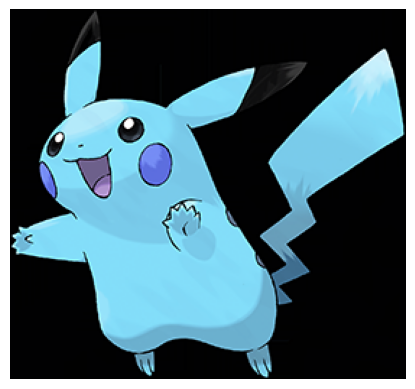

In [5]:
# run this cell as it is.
image = cv.imread("pika.jpg")
plt.axis('off')
plt.imshow(image)

Why is Pikachu looking like it is doing some very weird Smurf cosplay? Google it and try to find out the reason. Then fix it in the below code cell.

In [6]:
# output should look like the one shown below.
#CHECK THE CELLS AHEAD

##Reason

This happens because rgb is used as the default in plt matplotlib whereas the opencv uses bgr

We have read it in cv2 but were trying to display it in matplotlib so the order
of input and output was reversed.

I am using 2 ways to solve this , first is a patch fixing the above issue and second is conversion of bgr to rgb

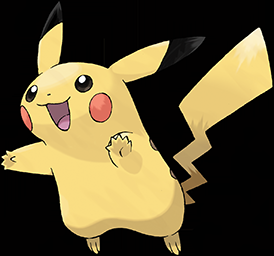

In [7]:
# either we can import a patch that fixes the cv2.imshow
from google.colab.patches import cv2_imshow
cv2_imshow(image)

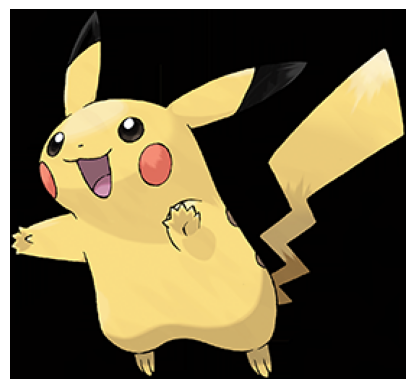

In [8]:
# or we can also convert the bgr to rgb:
RGB_img = cv.cvtColor(image, cv.COLOR_BGR2RGB)
plt.axis('off')
plt.imshow(RGB_img)

Google the one line code to convert image to grayscale in OpenCV and convert the downloaded image to grayscale. Plot the image using plt.imshow(). Remember to set the color map to "gray" (cmap = "gray") in plt.imshow() as plt automatically adds a color filter which is not needed.

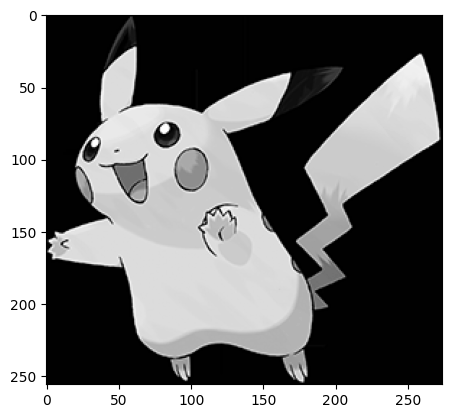

In [9]:
# convert RGB image to grayscale.
gray_image=cv.cvtColor(RGB_img,cv.COLOR_RGB2GRAY)
plt.imshow(gray_image,cmap="gray")

Use cv2.resize() to resize your image to (200, 200) and then show it using plt.

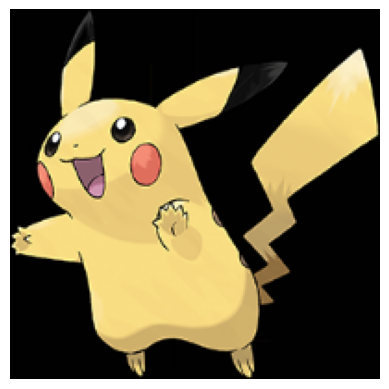

In [10]:
# resize image here.
resized_img=cv.resize(RGB_img,(200,200))
plt.axis('off')
plt.imshow(resized_img)

In [11]:
# the resized image should now have shape (200, 200, 3). check that here.
resized_img.shape

(200, 200, 3)

Write code for cropping the image from height 70 to 150 and width 50 to 120. Hint: be smart with your slicing while displaying the image.

In [12]:
# crop image here. desired output is as shown below.
# CHECK NEXT CELL

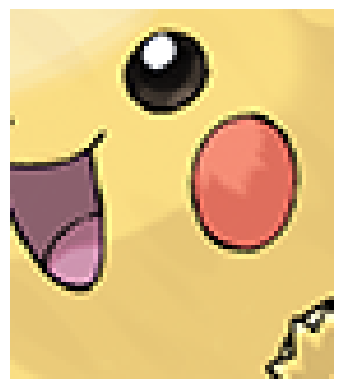

In [13]:
plt.axis('off')
plt.imshow(RGB_img[70:150, 50:120])

We can also draw lines on images with OpenCV. Lets make our Pikachu buff with some abs.

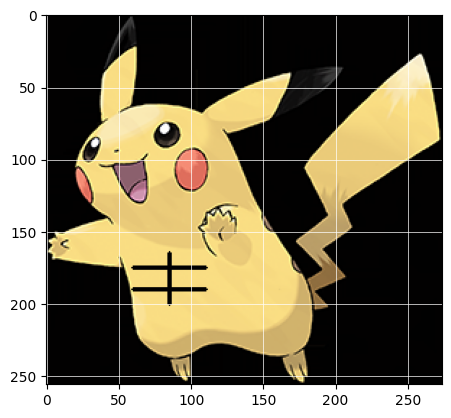

In [14]:
# run this cell as it is.
# to draw horizontal lines.
buff_pikachu = cv.line(image.copy(), (60, 175), (110, 175), (0, 0, 0), 2)
buff_pikachu = cv.line(buff_pikachu, (60, 190), (110, 190), (0, 0, 0), 2)
# to draw vertical line.
buff_pikachu = cv.line(buff_pikachu, (85, 200), (85, 165), (0, 0, 0), 2)
# i kept the axis for better understanding.
plt.grid(color='white', linestyle='-', linewidth=0.5)
plt.imshow(cv.cvtColor(buff_pikachu, cv.COLOR_BGR2RGB))


Draw random (sfw) stuff on pikachu. Any shape, any figure is allowed. Resource:
https://docs.opencv.org/4.x/dc/da5/tutorial_py_drawing_functions.html

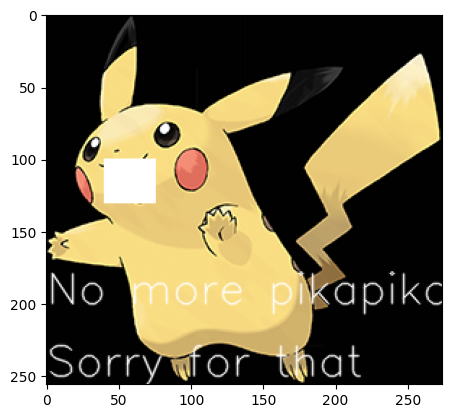

In [15]:
# playground.
pika1=cv.rectangle(image,(40,100),(75,130),(255,255,255),-1)
pika2=cv.putText(pika1,'No more pikapika',(0,200),cv.FONT_HERSHEY_SIMPLEX,1,(255,255,255),1,cv.LINE_AA)
pika3=cv.putText(pika2,'Sorry for that',(0,250),cv.FONT_HERSHEY_SIMPLEX,1,(255,255,255),1,cv.LINE_AA)
plt.imshow(cv.cvtColor(pika3,cv.COLOR_BGR2RGB))

## convolution

Before we do move ahead, we feel it important that you clearly understand what convolution is. A lot of stuff in preprocessing and in edge detection also involves convolving images.

Y'all must have studied the formula for convolution of two functions somewhere in your Engineering Maths III portion. If not, this is what the formula for it looks like:

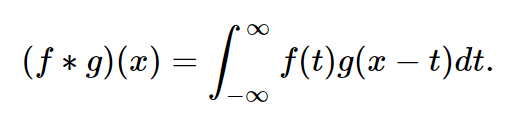

Yeah, they must have skipped over the part about how it is actually useful and just made you do a million integrals for it. To get a feel for what it exactly is, go through the resource below:

https://youtu.be/KuXjwB4LzSA?si=wc7iLGuUYEOw8TwA

As you may now know, it has use cases all over mathematics. But from an image processing point of view, this below GIF is essentially what it looks like:

<img src='https://upload.wikimedia.org/wikipedia/commons/1/19/2D_Convolution_Animation.gif' height='350px' >

For a clearer explanation, see the below video:

https://youtu.be/Etksi-F5ug8?si=pXAvAQJtPKa0s19v

All that should have made your concepts extremely clear. If not, go through the resources again.

Time to get your hands dirty now. As you may have realised, we first flip the kernel before convolving the image. So, write a function for flipping a two dimensional matrix horizontally from scratch. Try do an in-place flip to improve space complexity.

In [16]:

def flip(kernel):
    total_rows,total_columns=kernel.shape
    for row in range(total_rows):
      for column in range(int(total_columns/2)):
        kernel[row][column],kernel[row][total_columns-1-column]=kernel[row][total_columns-1-column],kernel[row][column]

    return kernel

# idk if I have 2 pointer approach correctly ,  I didnt feel the need to make 2 different pointers just did the whole thing by total and individual columns
# and restricting the range itself  ; altho column and total columns ko use krna hi shayad aim tha yaha 2 ptr approach ka cuz I am using 2 parts of the array at once ,
# one in beginning one in the end and moving towards the centre just lmk if ive used it correctly :)

#tho it struck me ki horizontal flip to sirf slicing se hi hojata : return kernel[:,::-1] , we just start seeing each column backwards per row
  # replace pass with a return statement. use your own logic here.
  # if you directly use cv2.flip() or something inbuilt like that, to maar khaoge fr.
  # hint: look into something called the two pointers approach for an optimised solution.


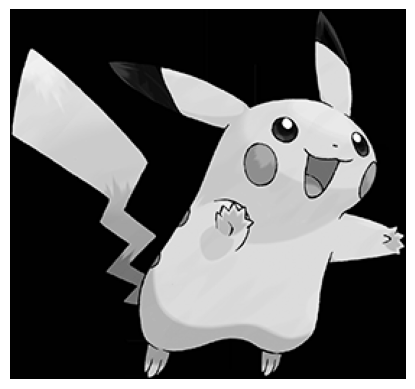

In [17]:
# run this cell as it is to check the output.
plt.axis('off')
# using a copy as the function does the flipping in-place.
plt.imshow(flip(gray_image.copy()), cmap = "gray")

Now, write a function to perform basic convolution. Assume that the image is grayscale so there is only one channel instead of the usual RBG channels. Note that kernels will always be a square matrix while an image can be of any shape.

Hint: Use slicing instead of for loops while performing addition operations.

In [18]:
def convolution(kernel, image):
  kernel_flipped=flip(kernel)
  img_rows,img_cols=image.shape
  krnl_rows,krnl_cols=kernel_flipped.shape
  final_rows=img_rows-krnl_rows+1
  final_cols=img_cols-krnl_cols+1
  convoluted_matrix = np.zeros((final_rows, final_cols)) # initialising with 0s at size of img  - kernel +1 as told in the convolution video shared above
  for row in range(final_rows):
    for col in range(final_cols):
      region=image[row:row+krnl_rows,col:col+krnl_cols]   #lol , this line took time but finally got it
      convoluted_matrix[row][col]=np.sum(region*kernel_flipped)
  return convoluted_matrix
  # replace pass with a return statement. needless to say, use your own logic here as well.
  # if we see np.convolve() anywhere here, taane sunoge ham sabse.
  # don't forget to flip the kernel with the above flip() function. that makes this a convolution function, else it is a cross-correlation function.

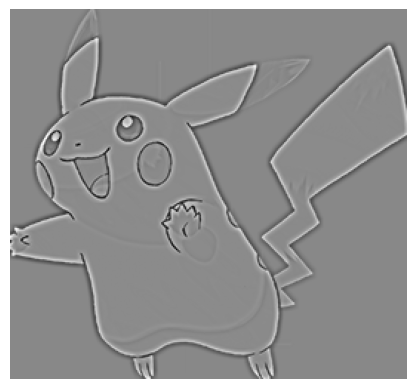

In [19]:
# run this cell as it is to check the output.
kernel = np.array([
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, 49, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1],
    [-1, -1, -1, -1, -1, -1, -1]
]) # 7 x 7 kernel to sharpen images.
plt.axis('off')
plt.imshow(convolution(kernel, gray_image), cmap = 'gray')

Here, you can see that we lose the border pixels (notice that pikachu's toes and fingers have been nibbled at by our kernel).

In [20]:
# shape is changed after convolution.
print("Shape before convolution =", gray_image.shape)
print("Shape after convolution =", convolution(kernel, gray_image).shape)

Shape before convolution = (256, 274)
Shape after convolution = (250, 268)


What if we want to ensure the output image is the same size as that of the input image? There we use something called padding. Resource:

https://youtu.be/PGBop7Ka9AU?si=zWKktXnDL1bN_iCE

Also, there is something called "stride" in convolution as well. Resource:

https://youtu.be/lxk_nmpqI5M?si=SCnShMXeGLRyDsBj

Implement a convolution function with stride in parameters. Use zero padding to pad the images.

In [21]:
def convolution_with_stride(kernel, image, stride):
    kernel_flipped = flip(kernel)
    img_rows,img_cols=image.shape
    krnl_rows,krnl_cols=kernel_flipped.shape
    p_rows=int((krnl_rows-stride)/2)
    """ye padding formula nikalne ke liye thoda maths and thoda gpt kiya but then I understood that corners waste nai ho isliye ye hai ,
     effective kernel shape/overlap that kernel will see after moving a stride so we use this for corners so that padding can be effectively applied
     by seeing the overlap and seeing how much padding would be required to cover all the corners too
     and then divide by 2 for the symmetry in rows and columns respectively """
    """ ik kernel square matrix hi hota hai so didnt have to do it seperately for
     rows and columns but upar krdiya tha so just going with the flow"""
    p_cols=int((krnl_cols-stride)/2)
    image=np.hstack((np.zeros((img_rows, p_cols)), image,np.zeros((img_rows, p_cols))))
    image=np.vstack((np.zeros((p_rows, image.shape[1])), image,np.zeros((p_rows, image.shape[1]))))
    final_rows=int((img_rows+2*p_rows-krnl_rows)/stride)+1
    final_cols=int((img_cols+2 *p_cols-krnl_cols)/stride)+1
    convoluted_matrix=np.zeros((final_rows,final_cols))
    i=j=0
    while i<final_rows:
        j=0
        while j<final_cols:
            region = image[i*stride:i*stride+krnl_rows,j*stride:j*stride+krnl_cols]
            convoluted_matrix[i][j] = np.sum(region*kernel_flipped)
            j+=1
        i+=1
    return convoluted_matrix


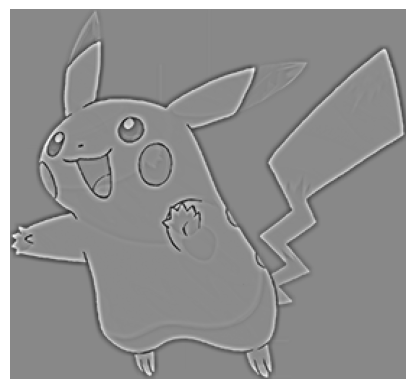

In [22]:
# run this cell as it is to check the output.
plt.axis('off')
plt.imshow(convolution_with_stride(kernel, gray_image, 1), cmap = 'gray')

This maintains both the original shape of the image as well as Pikachu's toes and fingers.

In [23]:
# shape should now be the same.
print("Shape before convolution =", gray_image.shape)
print("Shape after convolution =", convolution_with_stride(kernel, gray_image, 1).shape)

Shape before convolution = (256, 274)
Shape after convolution = (256, 274)


Play around with the stride parameter to see how it affects the convolution operation and its shape.

<ipython-input-24-9b7138c73d1d>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,4,1)


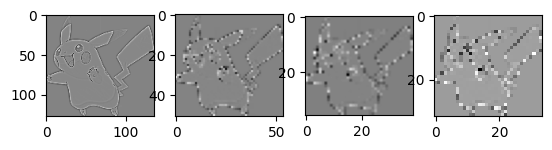

In [24]:
# playground.
plt.axis('off')
plt.subplot(1,4,1)
plt.imshow(convolution_with_stride(kernel, gray_image, 2), cmap = 'gray')
plt.subplot(1,4,2)
plt.imshow(convolution_with_stride(kernel, gray_image, 5), cmap = 'gray')
plt.subplot(1,4,3)
plt.imshow(convolution_with_stride(kernel, gray_image, 7), cmap = 'gray')
plt.subplot(1,4,4)
plt.imshow(convolution_with_stride(kernel, gray_image, 8), cmap = 'gray')

In the last task, we saw that we could do all of the above with Tensorflow. So why did we make you do all this? Because the underlined parameters in the below image of Conv2D layer's parameters will now make much more sense.

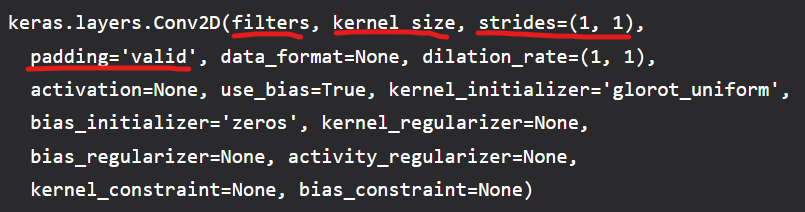

Apart from clearing your convolution concepts, it also hopefully made y'all realise the importance of DSA and how much thought goes into each inbuilt function that we usually directly import and apply. It is basic stuff like this that is sometimes modified into LeetCode problems. Examples:

https://leetcode.com/problems/flipping-an-image/

https://leetcode.com/problems/rotate-image/

#bonus

So, let us attempt the rotate image problem as a brownie points question.

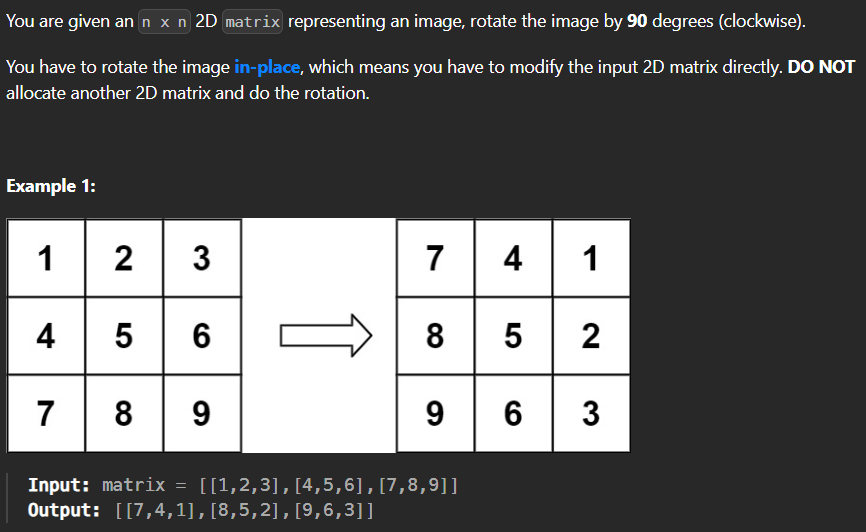

Write a function to do the above in the below code cell for our image. Modify matrix in-place.

In [25]:
def rotate(image):
  total_rows=image.shape[0]
  for row in range(total_rows):
    for column in range(row,total_rows):
      image[row][column],image[column][row] = image[column][row].copy(),image[row][column].copy()

  image= image[:,::-1]
  return image





  # replace pass with return statement.
  # yes, cv.rotate() exists. no, you are not allowed to use it.


## The DSA really does help , stretched my mind above so yaha pe it went smoother

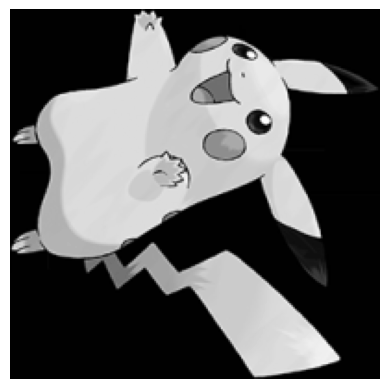

In [26]:
# run this cell as it is to check the output.
plt.axis('off')
# i resized the image to be a square one. care to wonder why?
plt.imshow(rotate(cv.resize(gray_image, (200, 200), interpolation = cv.INTER_AREA)), cmap = "gray")

## preprocessing images

That was a lot of brouhaha over convolution. Hopefully your functions are correct (test them out before starting this part!), as they are now going to be used for image preprocessing.

Just like we would preprocess DataFrames before actually doing any ML with them in the previous tasks, images need to be preprocessed first before applying algorithms on them as well. Resource:

https://www.analyticsvidhya.com/blog/2023/03/getting-started-with-image-processing-using-opencv/

A lot of preprocessing is just using special kernels to convolve over an image to yield certain output. The below images show some staple kernels and their usecases.

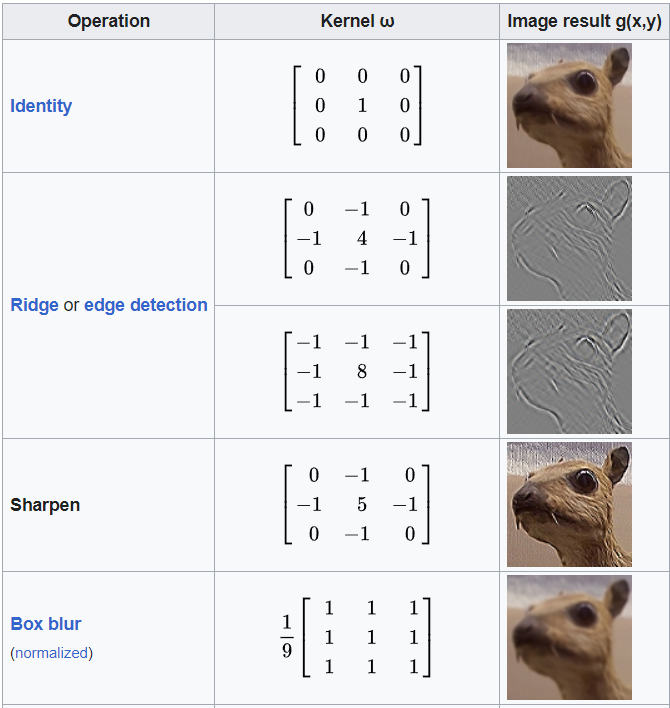
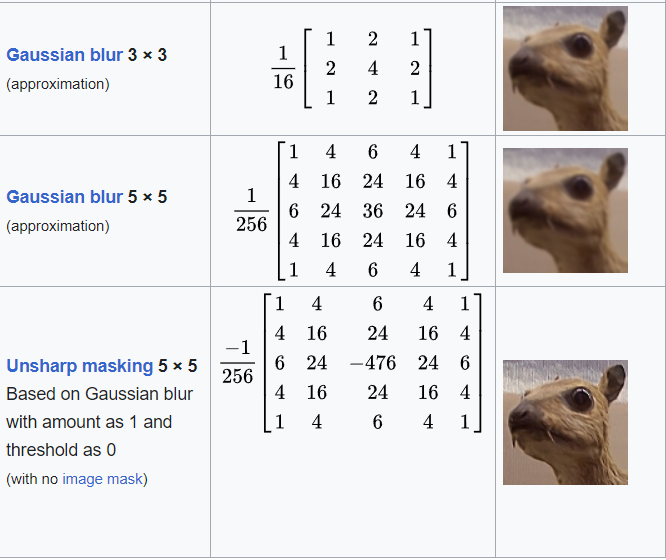

The earlier kernel we applied to test our convolution functions is called a sharpening filter, used used to accentuate the edges of the image and add contrast to them.

# blurring

Blurring is used to reduce noise in the image. The most common type is Gaussian Blur. Resource:

https://youtu.be/C_zFhWdM4ic?si=RPWKZi6MvS7SX32v

Let us apply Gaussian Blur on our given Pikachu image. The earlier convolution functions you've written will be quite handy now.

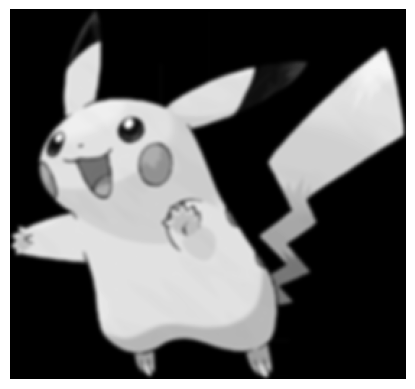

In [27]:
# run this cell as it is.
gb_kernel = np.array([
    [0.000798, 0.006581, 0.013347, 0.018614, 0.013347, 0.006581, 0.000798],
    [0.006581, 0.054223, 0.109394, 0.152377, 0.109394, 0.054223, 0.006581],
    [0.013347, 0.109394, 0.221008, 0.307116, 0.221008, 0.109394, 0.013347],
    [0.018614, 0.152377, 0.307116, 0.427661, 0.307116, 0.152377, 0.018614],
    [0.013347, 0.109394, 0.221008, 0.307116, 0.221008, 0.109394, 0.013347],
    [0.006581, 0.054223, 0.109394, 0.152377, 0.109394, 0.054223, 0.006581],
    [0.000798, 0.006581, 0.013347, 0.018614, 0.013347, 0.006581, 0.000798]
]) # 7 x 7 kernel for Guassian Blur.
plt.axis('off')
plt.imshow(convolution_with_stride(gb_kernel, gray_image, 1), cmap = 'gray')

Obviously, in practice we use inbuilt functions for all this. Look into the official docs for the various types of blurs and their implementations:

https://docs.opencv.org/4.x/d4/d13/tutorial_py_filtering.html

Apply Median Blur using OpenCV functions.

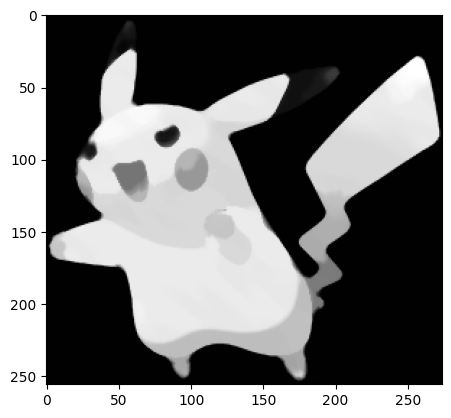

In [28]:
# apply Median Blur.
plt.imshow(cv.medianBlur(gray_image,9),cmap='gray')

In [29]:
# ghastly pikachu

Apply Bilateral Filtering and show the output.

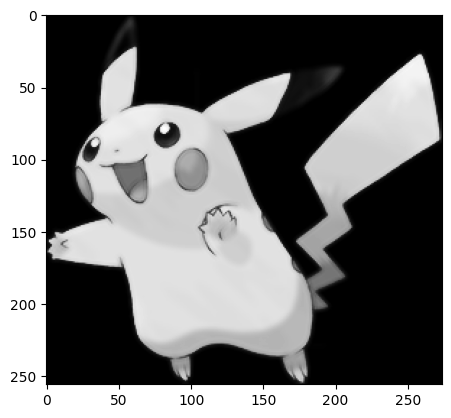

In [44]:
# apply Bilateral Filtering.
plt.imshow(cv.bilateralFilter(gray_image,7,95,45),cmap='gray')

##Hough Transform and Edge Detection

Download the image in the given drive link. Save it in your own drive.

https://drive.google.com/drive/folders/1ixpJaI7_iKm9kV-yWK0hcjhOkVZDe63b?usp=sharing

This is the TT1 schedule of this semester of a friend of mine from a different branch. Our task is to find all the vertical edges in it.

Some specific steps need to be followed for this, and each step's code reference is easily found online by simple Google searches. So, only theory resources are given for this section, none for implementation.

In [31]:
# read the TT timetable image and display it.
img = cv.imread('/content/gdrive/MyDrive/Synapse/Copy of tt1.jpeg')

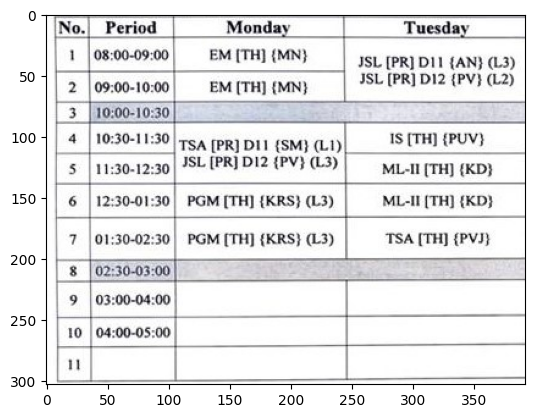

In [32]:
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

Step 1: Convert image to grayscale.

(Note: We usually convert to black and white, but here that would mean loss of vertical edges in the image as they are themselves black. Hence, we don't do that in this case.)

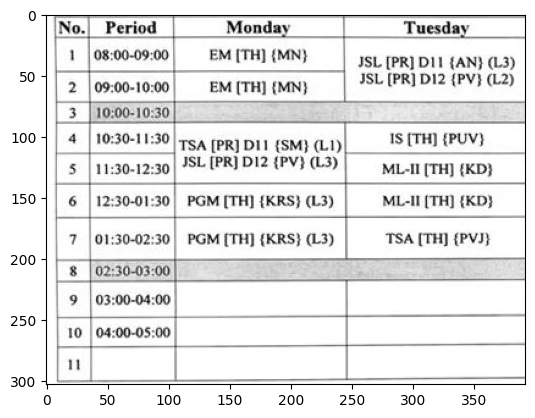

In [33]:
# convert to grayscale and show image.
gray_tt=cv.cvtColor(img,cv.COLOR_RGB2GRAY)
plt.imshow(gray_tt,cmap='gray')

Step 2: Apply Gaussian Blur with OpenCV functions.

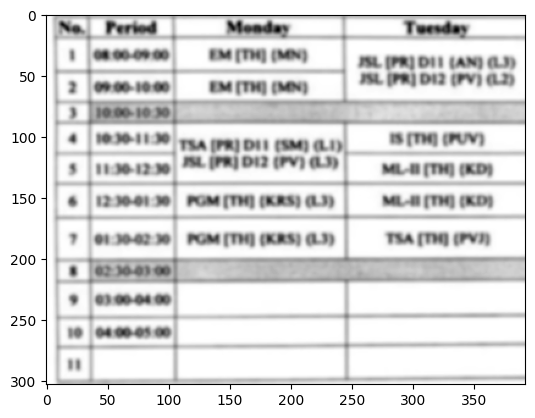

In [34]:
# apply Gaussian Blur and show image.
gauss_blur = cv.GaussianBlur(gray_tt,(7,7),0)
plt.imshow(gauss_blur,cmap='gray')

Step 3: Apply Canny Edge detection. Resources:

https://youtu.be/uihBwtPIBxM?si=dzspcgGtKxSAsgV7

https://youtu.be/sRFM5IEqR2w?si=0775wZiBu9uN6lEX

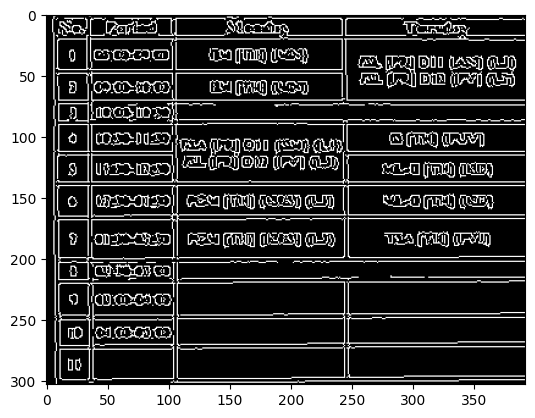

In [35]:
# apply Canny Edge detection and show image.
edge_detect=cv.Canny(gauss_blur,50,70)
plt.imshow(edge_detect,cmap='gray')

Step 4: Now, we use the HoughLinesP (probabilistic hough transform) for actual vertical line detection. Resources:

https://youtu.be/4zHbI-fFIlI?si=RkV_z7FE6iLKYLQV

https://www.analyticsvidhya.com/blog/2022/06/a-complete-guide-on-hough-transform/

In [36]:
# detect vertical lines. feel free to add and remove parameters as you deem appropriate.
lines = cv.HoughLinesP(image = edge_detect, # insert image.
                       rho =1 , # insert appropriate value.
                       theta = np.pi / 180, # insert appropriate value.
                       threshold = 20, # insert appropriate value.
                       minLineLength = 30, # insert appropriate value.
                       maxLineGap = 10 ) # insert appropriate value.

# initialize an empty 1-D list to store vertical line coordinates.
coordinates =[]

# collect coordinates of detected vertical lines.
for line in lines:
    x1, y1, x2, y2 = line[0]# insert appropriate variable.
    angle = np.arctan2(y2-y1,x2-x1) * 180 / np.pi # insert appropriate variable(s).

    # filter out vertical lines.
    if abs(angle) == 90: # insert appropriate value for angle. #since vertical line is to be detected therefore 90
        coordinates.append((x1, y1, x2, y2))
        # draw the line on the original image.
        cv.line(img, (x1, y1), (x2, y2), (0, 0, 255), 2)

for x1, y1, x2, y2 in coordinates:
  print(f"Vertical Line: ({x1}, {y1}) - ({x2}, {y2})")

Vertical Line: (34, 250) - (34, 44)
Vertical Line: (7, 297) - (7, 197)
Vertical Line: (6, 196) - (6, 15)
Vertical Line: (10, 251) - (10, 161)
Vertical Line: (107, 300) - (107, 118)
Vertical Line: (244, 296) - (244, 220)
Vertical Line: (37, 204) - (37, 39)
Vertical Line: (247, 296) - (247, 217)
Vertical Line: (9, 58) - (9, 17)
Vertical Line: (104, 300) - (104, 125)
Vertical Line: (106, 117) - (106, 4)
Vertical Line: (103, 175) - (103, 5)
Vertical Line: (244, 161) - (244, 198)
Vertical Line: (38, 301) - (38, 205)
Vertical Line: (35, 301) - (35, 239)
Vertical Line: (243, 142) - (243, 87)
Vertical Line: (242, 69) - (242, 4)
Vertical Line: (11, 298) - (11, 244)
Vertical Line: (246, 121) - (246, 87)
Vertical Line: (36, 50) - (36, 1)
Vertical Line: (33, 54) - (33, 4)


Let us see our final results on our original image. Show the modified original image.

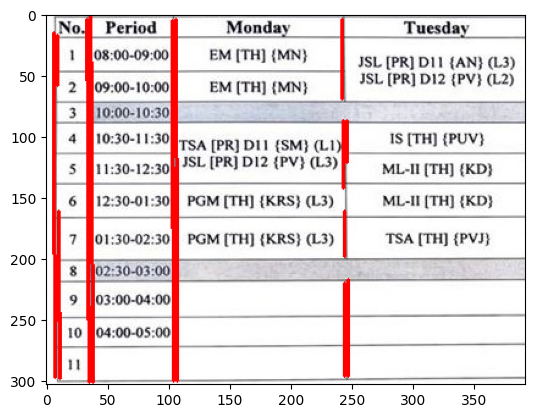

In [37]:
# best output that we could get. every line is kinda detected, but its not perfect.
plt.imshow(cv.cvtColor(img,cv.COLOR_BGR2RGB))

Play around with the above code snippets in new cells to obtain even better results for detecting vertical edges.

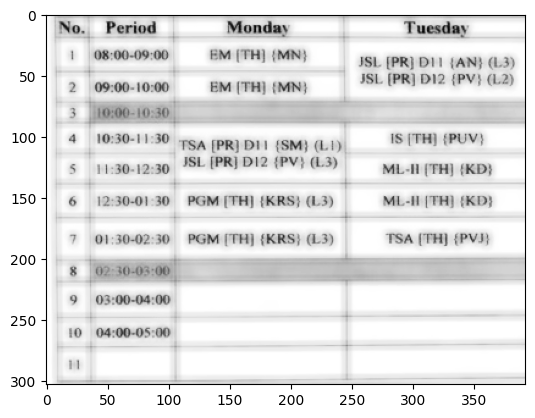

In [38]:
# playground.
blur_2=cv.bilateralFilter(gray_tt,10,100,95)
plt.imshow(blur_2,cmap='gray')
# Using bilateral filtering in place of gaussian blur , it is too a gausian filter but more sensitive to edges

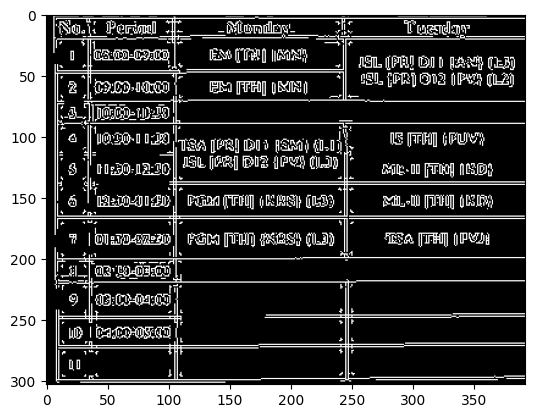

In [39]:
edge_detect_2=cv.Canny(blur_2,50,70)
plt.imshow(edge_detect_2,cmap='gray')

In [40]:
# detect vertical lines. feel free to add and remove parameters as you deem appropriate.
lines = cv.HoughLinesP(image = edge_detect_2, # insert image.
                       rho =1 , # insert appropriate value.
                       theta = np.pi / 180, # insert appropriate value.
                       threshold = 20, # insert appropriate value.
                       minLineLength = 30, # insert appropriate value.
                       maxLineGap = 10 ) # insert appropriate value.

# initialize an empty 1-D list to store vertical line coordinates.
coordinates =[]

# collect coordinates of detected vertical lines.
for line in lines:
    x1, y1, x2, y2 = line[0]# insert appropriate variable.
    angle = np.arctan2(y2-y1,x2-x1) * 180 / np.pi # insert appropriate variable(s).

    # filter out vertical lines.
    if abs(angle) == 90: # insert appropriate value for angle. #since vertical line is to be detected therefore 90
        coordinates.append((x1, y1, x2, y2))
        # draw the line on the original image.
        cv.line(gray_tt, (x1, y1), (x2, y2), (0, 0, 255), 2)

for x1, y1, x2, y2 in coordinates:
  print(f"Vertical Line: ({x1}, {y1}) - ({x2}, {y2})")

Vertical Line: (9, 175) - (9, 41)
Vertical Line: (7, 221) - (7, 41)
Vertical Line: (106, 233) - (106, 43)
Vertical Line: (245, 299) - (245, 220)
Vertical Line: (104, 204) - (104, 67)
Vertical Line: (35, 252) - (35, 162)
Vertical Line: (34, 73) - (34, 20)
Vertical Line: (247, 299) - (247, 220)
Vertical Line: (34, 141) - (34, 87)
Vertical Line: (107, 297) - (107, 216)
Vertical Line: (105, 56) - (105, 2)
Vertical Line: (36, 121) - (36, 84)
Vertical Line: (245, 67) - (245, 21)
Vertical Line: (10, 301) - (10, 267)
Vertical Line: (8, 300) - (8, 242)
Vertical Line: (246, 201) - (246, 87)
Vertical Line: (244, 198) - (244, 113)
Vertical Line: (101, 278) - (101, 182)
Vertical Line: (37, 252) - (37, 216)


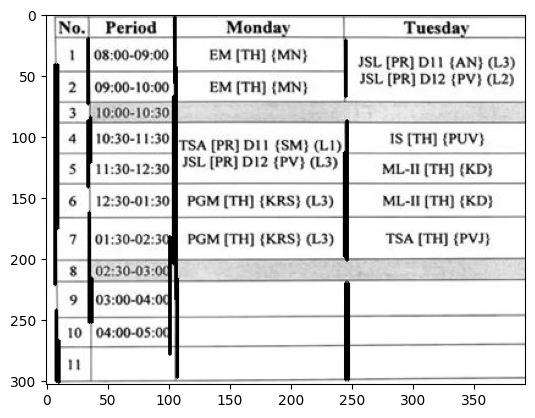

In [41]:
plt.imshow(gray_tt,cmap='gray')

# **bonus: to be done only if you have completed the above tasks.**

You can research and create a short blog on the topic of **Transfer Learning.** The best research will be edited and featured on the Synapse Instagram and LinkedIn pages. Happy coding! :)

# Transfer Learning
## Stand on the shoulders of giants and build on it
Transfer learning means to use a pretrained model and niche it down to a specific task of yours , many models exist either opensource or free to use on our own data , these models basically help using their frozen pretrained weights in specific tasks to enhance the specific task we are performing under that widespread field

**Examples in the field of computer vision:**

*Frameworks:*

*   yolo (you only look once)
*   tensorflow(obviosly)
*   keras
*   pyplot and many more...



*Specific models:*


*   yolov8
*   yolo pose (recent talk of the town)
*   mobilenetv2
*   resnet 50
*   facenet
*   open face
*   open pose
*   alpha pose
*   crnn
*   and the list goes on and on.


**Examples in the field of nlp**:


*   BERT(** THE GOAT**)(uses the concepts of transformer , w paper , w model)
*   XLNet
*   RoBERTa
*   Word2vec
*   T5
*   DistilBERT
*   VADER ... and many many more



Now lets understand a simple use case:


Let us say that you want to conduct sign language detection for blind people , in that case the basic task your model would have to perform would be of object detection , so for creating your model you could use an object detection model , let's assume yolov5 or yolov8 and over that you will then develop and (after conducting the due diligence of cleaning and preprocessing the data) train your data of different sign language images and make a final model with the weights which give a high accuracy score on new or raw data too , well this does not mean that one must use a model to build another one on top of it .
One can just as simply create a sign language classifier without using any other model to build on top of , but since models like yolov5 are already trained on object detection , they make your task easier and accuracy better .
This is how one can use transfer learning by using already trained models which have weights set from huge datasets trained already and applying them in our own problems in our own ways to make real world problems easier to solve and with a better accuracy than regular models.



# **End of Task**

> ©Synapse 2023 - 2024

